# [Hackaton WorldCalss](http://www.forbes.ru/sp/microsoft/)

Определите вероятность перехода каждого клиента компании в статус бывшего члена клуба, достигнув максимального значения по статистической метрике качества *AUC ROC*

## Variables

### Contracts
- КодКлиента                         
- КодКонтракта                       
- КодНоменклатуры                    
- **REMADE** ДатаНачалаСрокаДействия            
- **REMADE**ДатаОкончанияСрокаДействия         
- **REMADE** ВидСтажаНаНачалоМесяца             
- **REMADE** ВидСтажаВМоментПриобретения        
- ВидДоговора                    
- БонусыОстаток                    
- **FIXED** ДлительностьКонтракта              
- Переоформлялся                     
- ВозрастнаяКатегория                
- СегментКлуба                       
- КоличествоПлатныхСодоступов        
- ОстатокДнейЗаморозок               
- КупленоВсегоЗаморозок 

### To Dummies:
- Exp_beg_month
- Exp_at_purchase

### To Drop:
- ВидСтажаНаНачалоМесяца
- ВидСтажаВМоментПриобретения
- ДатаНачалаСрокаДействия
- ДатаОкончанияСрокаДействия

### All your data belongs to us!

- So far we have two fractions of data - one from December (train set), the other from March (test set)
- Both have four datasets in each, somehow we need to concatenate all of them into one large matrix
- First of all, I'll connect pairwisely the similar datasets from test and train

In [71]:
import pandas as pd
import numpy as np
import matplotlib
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy import array, newaxis

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

## Contracts

In [10]:
cont_train = pd.read_csv('C://Users//Auditore//Desktop//MicrosoftHack//December//contracts.csv', encoding = 'cp1251')
cont_test = pd.read_csv('C://Users//Auditore//Desktop//MicrosoftHack//March//contracts.csv', encoding = 'cp1251')

In [31]:
#cont_train.info()

In [32]:
#cont_test.info()

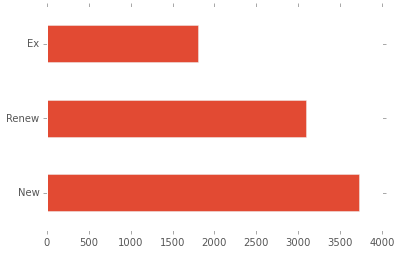

In [17]:
%matplotlib inline
cont_train.ВидСтажаВМоментПриобретения.value_counts().plot(kind='barh')
plt.style.use('ggplot')

In [18]:
prodlilsya = cont_train.Продлился
cont_train.drop(['Продлился'], axis = 1, inplace = True)

In [20]:
cont_train['Test'] = False
cont_test['Test'] = True
cont_data = pd.concat([cont_train, cont_test], ignore_index=True)

In [22]:
cont_data.head()

,КодКлиента,КодКонтракта,КодНоменклатуры,ДатаНачалаСрокаДействия,ДатаОкончанияСрокаДействия,ВидСтажаНаНачалоМесяца,ВидСтажаВМоментПриобретения,ВидДоговора,БонусыОстаток,ДлительностьКонтракта,Переоформлялся,ВозрастнаяКатегория,СегментКлуба,КоличествоПлатныхСодоступов,ОстатокДнейЗаморозок,КупленоВсегоЗаморозок,Test
0,3101,29908,36109,21.11.2014,20.12.2015,Renew,Renew,NaN,390,365,0,Взрослые,Lower,0,0,0,False
1,3120,28457,99,26.06.2015,24.12.2015,Renew,Ex,NaN,645.14,182,0,Взрослые,Lower,0,0,0,False
2,3126,8230,99,29.10.2014,27.12.2015,Renew,Renew,NaN,6 275.96,395,0,Взрослые,Upper,0,0,0,False
3,3153,8121,99,02.12.2014,15.12.2015,Renew,Renew,NaN,0.72,365,0,Взрослые,Upper,0,16,0,False
4,3156,29730,36109,16.11.2014,11.12.2015,Renew,Renew,NaN,520,365,0,Взрослые,Lower,0,4,0,False


# It's Engineering time!
---

In [24]:
cont_data.isnull().sum()

КодКлиента                         1
КодКонтракта                       0
КодНоменклатуры                    0
ДатаНачалаСрокаДействия            1
ДатаОкончанияСрокаДействия         0
ВидСтажаНаНачалоМесяца             0
ВидСтажаВМоментПриобретения        1
ВидДоговора                    13841
БонусыОстаток                    312
ДлительностьКонтракта              1
Переоформлялся                     0
ВозрастнаяКатегория                0
СегментКлуба                       0
КоличествоПлатныхСодоступов        0
ОстатокДнейЗаморозок               0
КупленоВсегоЗаморозок              0
Test                               0
dtype: int64

---
- ВидСтажаНаНачалоМесяца

In [28]:
cont_data.ВидСтажаНаНачалоМесяца.value_counts()

Renew    9184
New      8446
Ex          2
dtype: int64

In [29]:
cont_data['Exp_beg_month'] = le.fit_transform(cont_data.ВидСтажаНаНачалоМесяца)

In [30]:
cont_data.Exp_beg_month.value_counts()

2    9184
1    8446
0       2
dtype: int64

---

- ВидСтажаВМоментПриобретения

In [47]:
cont_data.index[cont_data.ВидСтажаВМоментПриобретения.isnull()]

Int64Index([17440], dtype='int64')

In [59]:
cont_data.loc[17440, 'ВидСтажаВМоментПриобретения'] = 'New'

In [63]:
cont_data['Exp_at_purchase'] = le.fit_transform(cont_data.ВидСтажаВМоментПриобретения)

In [64]:
cont_data.Exp_at_purchase.value_counts()

1    7647
2    6268
0    3717
dtype: int64

---

- ДатаНачалаСрокаДействия
- ДатаОкончанияСрокаДействия
- ДлителностьКонтракта

In [155]:
cont_data.index[cont_data.ДатаНачалаСрокаДействия.isnull()]

Int64Index([], dtype='int64')

In [143]:
cont_data.loc[6499, 'ДатаОкончанияСрокаДействия']

'30.12.2015'

In [158]:
cont_data.loc[6499, 'ДлительностьКонтракта']

365.0

In [159]:
cont_data.loc[6499, 'ДатаНачалаСрокаДействия'] = '30.12.2014'

In [160]:
dates_begin = pd.to_datetime(cont_data.ДатаНачалаСрокаДействия, format = '%d.%m.%Y')
dates_end = pd.to_datetime(cont_data.ДатаОкончанияСрокаДействия, format = '%d.%m.%Y')

In [164]:
cont_data['Cont_length'] = dates_end-dates_begin

In [165]:
cont_data['Cont_length'] = cont_data['Cont_length'].apply(lambda x: x / np.timedelta64(1,'D'))

- Adding columns with month and day of purchase 

In [169]:
cont_data['beg_month'] = dates_begin.apply(lambda x: x.month)
cont_data['beg_day'] = dates_begin.apply(lambda x: x.day)

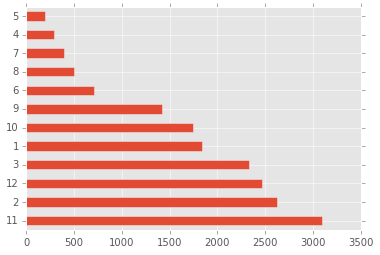

In [170]:
cont_data.beg_month.value_counts().plot(kind='barh')

- Maybe it will be useful to know, what was the season when the purchase was made

In [171]:
def get_season(month):
    if month <= 2 or month==12:
        season = 0
    elif 2<month<=5:
        season = 1
    elif 5<month<=8:
        season = 2
    else:
        season = 3
    return season

In [172]:
for month in cont_data.beg_month.unique():
    cont_data.loc[cont_data.index[cont_data.beg_month==month], 'Season'] = get_season(month)

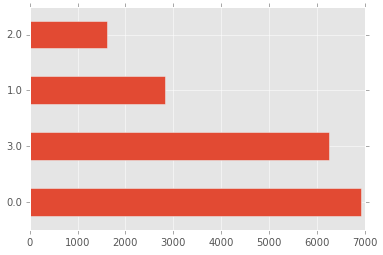

In [173]:
cont_data.Season.value_counts().plot(kind='barh')

In [178]:
cont_data.index[cont_data.ДлительностьКонтракта.isnull()]

Int64Index([17440], dtype='int64')

In [179]:
cont_data.loc[17440, 'ДлительностьКонтракта'] = cont_data.loc[17440, 'Cont_length']